<a href="https://colab.research.google.com/github/Clonlyfan/Statistics-and-more/blob/main/Classifying_Math_Problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
# Install the Kaggle API if you haven't already
!pip install kaggle

# Create the kaggle directory
!mkdir -p ~/.kaggle

# Create the kaggle.json file with your credentials
import os
import json

# Your username
kaggle_username = "ishan123987"
# Replace with your actual API key from the kaggle.json file
kaggle_key = "08c7cd04f3b2bb985798af54455168b1"

# Create the json file
kaggle_cred = {"username": kaggle_username, "key": kaggle_key}
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(kaggle_cred, file)

# Set permissions
!chmod 600 ~/.kaggle/kaggle.json

# Download the Math-Students Performance Data
!kaggle competitions download -c classification-of-math-problems-by-kasut-academy

# Unzip the dataset
!unzip classification-of-math-problems-by-kasut-academy

classification-of-math-problems-by-kasut-academy.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  classification-of-math-problems-by-kasut-academy.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sample_submission.csv   
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               


**EDA (Exploratory Data Analysis)**


In [73]:
!pip uninstall pandas -y
!pip install pandas
import pandas as pd

# Load the training data
train_df = pd.read_csv('train.csv')

# Check the shape (rows and columns)
print("Training data shape:", train_df.shape)

# View the first few rows
print("\nFirst 5 rows of training data:")
display(train_df.head())

# Check column names and data types
print("\nColumn information:")
display(train_df.info())

# Load the test data
test_df = pd.read_csv('test.csv')
print("\nTest data shape:", test_df.shape)
display(test_df.head())


Found existing installation: pandas 2.2.3
Uninstalling pandas-2.2.3:
  Successfully uninstalled pandas-2.2.3
  Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
Training data shape: (10189, 2)

First 5 rows of training data:


,Question,label
0,A solitaire game is played as follows. Six di...,3
1,2. The school table tennis championship was he...,5
2,"Given that $x, y,$ and $z$ are real numbers th...",0
3,$25 \cdot 22$ Given three distinct points $P\l...,1
4,I am thinking of a five-digit number composed ...,5



Column information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10189 entries, 0 to 10188
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Question  10189 non-null  object
 1   label     10189 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 159.3+ KB


None


Test data shape: (3044, 2)


,id,Question
0,0,b'Solve 0 = -i - 91*i - 1598*i - 64220 for i.\n'
1,1,Galperin G.A.\n\nA natural number $N$ is 999.....
2,2,Example 7 Calculate $\frac{1}{2 \sqrt{1}+\sqrt...
3,3,"If $A$, $B$, and $C$ represent three distinct ..."
4,4,2. Calculate $1+12+123+1234+12345+123456+12345...


**Missing Values AND label distribution**


In [74]:

print("Checking for missing values in each column:")
print(train_df.isnull().sum())
print(train_df['label'].value_counts())

Checking for missing values in each column:
Question    0
label       0
dtype: int64
label
0    2618
1    2439
5    1827
4    1712
2    1039
3     368
6     100
7      86
Name: count, dtype: int64


*The label distribution is imbalanced. Most data points belong to labels 0, 1, 5, and 4, while labels 6 and 7 have very few examples. This imbalance should be addressed during modeling—possibly through class weighting, resampling, or other strategies—to prevent bias toward majority classes.*

**Bar chart**

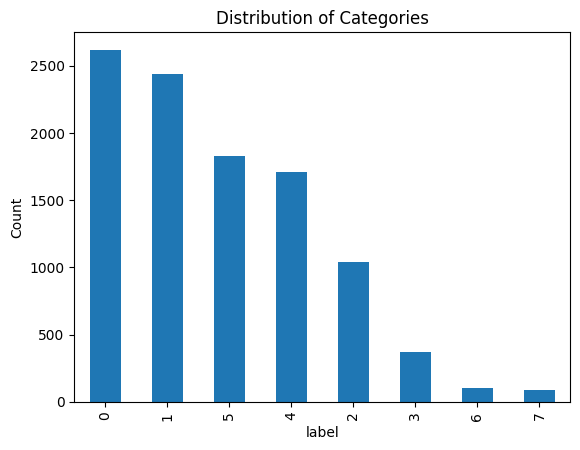

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
counts = train_df['label'].value_counts()

# Plot bar chart
counts.plot(kind='bar')

# Add labels and title
plt.xlabel('label')
plt.ylabel('Count')
plt.title('Distribution of Categories')
plt.show()

In [76]:
!pip install langdetect
!pip install googletrans==4.0.0-rc1
!pip install joblib
!pip install tqdm

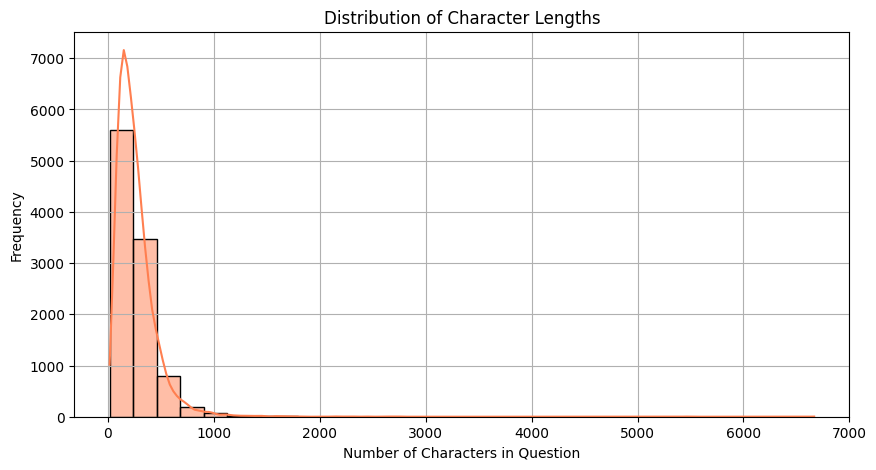

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
train_df["char_length"] = train_df["Question"].astype(str).apply(len)

plt.figure(figsize=(10, 5))
sns.histplot(train_df["char_length"], bins=30, kde=True, color='coral')
plt.title("Distribution of Character Lengths")
plt.xlabel("Number of Characters in Question")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

*Plot displays the distribution of the number of characters in each question. We see that most questions are relatively short, clustering between roughly 0 and 300 characters, with a sharp peak around a much smaller range (likely under 100 characters). The distribution is right-skewed, meaning a small number of questions are very long, stretching up to around 6000 characters, but these are rare.*


This suggests that:

    The majority of the data consists of concise questions, which is typical for many Q&A or NLP datasets.

    There are a few outliers with unusually long questions, which might need to be handled (e.g., by trimming or special preprocessing) to avoid issues in modeling. *italicized text*

100%|██████████| 10189/10189 [00:26<00:00, 391.62it/s]



Unique languages (excluding math-heavy): 17
Language counts:
 language_final
en            8820
math-heavy    1340
hr               8
es               3
de               3
ro               2
fr               2
no               1
sl               1
hu               1
da               1
pt               1
nl               1
id               1
it               1
ca               1
af               1
so               1
Name: count, dtype: int64


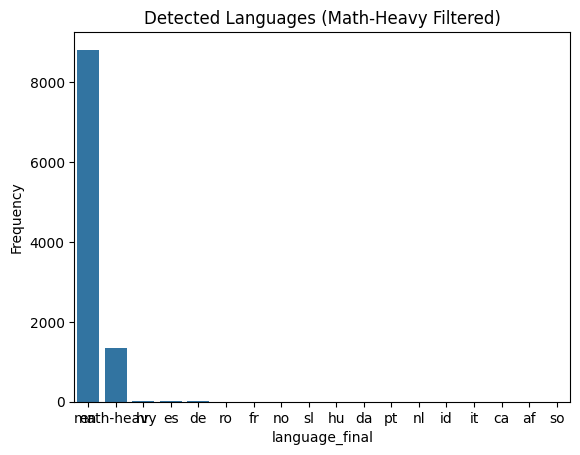

In [78]:
!pip install pylatexenc
import re
import matplotlib.pyplot as plt
import seaborn as sns
from langdetect import detect, DetectorFactory
from pylatexenc.latex2text import LatexNodes2Text
from tqdm import tqdm

DetectorFactory.seed = 0  # reproducibility

# --- Clean LaTeX ---
def clean_latex(text):
    if not isinstance(text, str):
        return text
    text = LatexNodes2Text().latex_to_text(text)
    text = re.sub(r'sqrt\{([^{}]+)\}|sqrt\(([^()]+)\)', r'square root of (\1\2)', text)
    text = re.sub(r'frac\{([^{}]+)\}\{([^{}]+)\}|frac\(([^()]+)\)\(([^()]+)\)', r'(\1\2) divided by (\3\4)', text)
    text = re.sub(r'\^\{([^{}]+)\}|\^(\d+)', r' to the power of \1\2', text)
    text = re.sub(r'[\$\\]', '', text)
    return re.sub(r'\s+', ' ', text).strip()

# --- Helper functions ---
def clean_for_langdetect(text):
    return re.sub(r'[^A-Za-z\s]', '', re.sub(r'\$.*?\$', '', text))

def non_alpha_ratio(text):
    total = len(text)
    alpha = len(re.findall(r'[A-Za-z]', text))
    return 1 if total == 0 else (total - alpha) / total

# --- Apply cleaning ---
tqdm.pandas()
train_df['question_text_cleaned'] = train_df['Question'].astype(str).progress_apply(clean_latex)
train_df['language_cleaned'] = train_df['question_text_cleaned'].apply(clean_for_langdetect)
train_df['non_alpha_ratio'] = train_df['question_text_cleaned'].apply(non_alpha_ratio)
train_df['is_math_heavy'] = train_df['non_alpha_ratio'] > 0.5

# --- Detect language ---
def detect_lang(row):
    if row['is_math_heavy']:
        return 'math-heavy'
    text = row['language_cleaned']
    return detect(text) if text.strip() else "unknown"

train_df['language_final'] = train_df.progress_apply(detect_lang, axis=1)

# --- Plot ---
lang_counts = train_df['language_final'].value_counts()
print(f"\nUnique languages (excluding math-heavy): {lang_counts[lang_counts.index != 'math-heavy'].count()}")
print("Language counts:\n", lang_counts)

sns.barplot(x=lang_counts.index, y=lang_counts.values)
plt.title("Detected Languages (Math-Heavy Filtered)")
plt.ylabel("Frequency")
plt.show()



In [79]:

# --- Print first two math-heavy questions ---
math_heavy_samples = train_df[train_df['is_math_heavy']]['Question'].head(2)
print("\nFirst two math-heavy questions:")
for idx, text in enumerate(math_heavy_samples, 1):
    print(f"{idx}: {text}")

# --- Print first two questions for each other language (excluding 'en' and 'math-heavy') ---
other_langs = train_df[
    ~train_df['language_final'].isin(['en', 'math-heavy'])
]['language_final'].unique()

print("\nFirst two questions for each other language (excluding English and math-heavy):")
for lang in other_langs:
    samples = train_df[train_df['language_final'] == lang]['Question'].head(2)
    print(f"\nLanguage: {lang}")
    for idx, text in enumerate(samples, 1):
        print(f"{idx}: {text}")



First two math-heavy questions:
1: b'Let i be (-45)/72 + (-1389)/(-8). Solve i = -6*u + 149 for u.\n'
2: Let $x=\frac{4}{(\sqrt{5}+1)(\sqrt[4]{5}+1)(\sqrt[8]{5}+1)(\sqrt[16]{5}+1)}.$ Find $(x+1)^{48}.$

First two questions for each other language (excluding English and math-heavy):

Language: fr
1: 16. Assemble a square using four $1 \times 1$ square tiles, eight $2 \times 2$ square tiles, twelve $3 \times 3$ square tiles, and sixteen $4 \times 4$ square tiles.
2: 2. (6 points) $\square \square \square \square \square+\bigcirc \bigcirc O=39$ liters
■■■+○○○=27 liters
■ represents $\qquad$ liters, ○ represents $\qquad$ liters.

Language: hr
1: 5. Bacamo istovremeno četiri simetrična novčića (za simetričan novčić vjerojatnosti da će pasti pismo ili glava su jednake). Kolika je vjerojatnost da su pri jednom bacanju ta četiri novčića pala dva pisma i dvije glave?

## Zadaci za 10 bodova:

Translates to:

5. We toss four symmetrical coins simultaneously (for a symmetrical coin, the probabil

**Exploring Math-Heavy and Multilingual Questions**

In [80]:
# Languages suspected of being misclassified
suspect_langs = ['so', 'af', 'ca', 'it', 'nl', 'pt', 'da', 'es', 'no', 'fr']

print("\nInspecting suspect languages for possible English content:")
for lang in suspect_langs:
    samples = train_df[train_df['language_final'] == lang]['Question'].head(5)
    print(f"\nLanguage: {lang}")
    for idx, text in enumerate(samples, 1):
        print(f"{idx}: {text}")



Inspecting suspect languages for possible English content:

Language: so
1: Example 6. Find $\lim _{x \rightarrow 0} \frac{\tan x}{x}$.

Language: af
1: 1. If $p(x)$ is an $n$-degree polynomial, and satisfies $p(k)=\frac{k}{k+1}(k=0,1, \cdots, n)$, find $p(n+1)$.

Language: ca
1: A trader mixes 70%, 64%, and 50% vinegar to make 560 liters of 60% vinegar; how does he mix them if he takes whole liters of each type of vinegar for the mixture?

Language: it
1: Find all even primes.

Language: nl
1: How many zeroes does $10!$ end in, when written in base 11?

Language: pt
1: 2. Solve the equation $\cos x \cos 2x \cos 4x \cos 8x = \frac{1}{16}$.

Language: da
1: Determine the value of $\left(\log _{2} 4\right)\left(\log _{4} 6\right)\left(\log _{6} 8\right)$.

Language: es
1: Example 5 Simplify $\frac{\sin x+\sin 3 x+\sin 5 x+\cdots+\sin (2 n-1) x}{\cos x+\cos 3 x+\cos 5 x+\cdots+\cos (2 n-1) x}$.
2: 6 、 Calculate the value of $\cos \frac{2 \pi}{7} \cos \frac{4 \pi}{7} \cos \frac{6 \pi}{7}$

*The math-heavy questions are typically rich in equations and symbols, confirming that the is_math_heavy tag captures mathematically dense content. When browsing other languages, It is noticed that many questions still involve math problems but in different linguistic and cultural contexts (e.g., Slovenian, Danish, German). This highlights the dataset's dual complexity: it spans both mathematical difficulty and linguistic diversity. Such patterns are essential to consider for any downstream NLP task, especially for multilingual or math-focused language models.*

 *It observed that some text samples are misclassified as non-English (e.g., 'fr', 'it', 'es') despite being English. To correct this, we identify a list of suspect languages where misclassification is common and relabel them as English. This ensures more accurate downstream processing.
This correction step improves language labeling by reclassifying likely errors as 'en'. It helps prevent non-English labels from skewing results when the actual content is English. We assume that most samples in the suspect list are misclassifications rather than true foreign-language texts.*

In [81]:
def fix_misclassified_lang(row):
    suspect_langs = ['so', 'af', 'ca', 'it', 'nl', 'pt', 'da', 'es', 'no', 'fr']
    if row['language_final'] in suspect_langs:
        # Optional: Add more checks here if needed (like word count >5 to avoid forcing math-heavy)
        return 'en'
    return row['language_final']

train_df['language_final_fixed'] = train_df.apply(fix_misclassified_lang, axis=1)


*the language_final_fixed column to inspect the distribution of languages after applying heuristic fixes to the data. This helps verify whether the language detection and correction steps worked as expected, and shows the balance of different languages present in the dataset.*
Interpretation:

*The output indicates that the vast majority of samples (8,833) are in English (en), followed by a substantial group labeled as math-heavy (1,340). The remaining languages (e.g., Croatian hr, German de, Romanian ro, Hungarian hu, Slovenian sl, and Indonesian id) appear in very small numbers (between 1 and 8 instances each). This strong imbalance suggests that the dataset is predominantly English with a secondary emphasis on math-heavy content, while other languages are rare. These insights can guide preprocessing and modeling choices, for example by focusing efforts primarily on English data or deciding how to handle underrepresented languages.*

In [82]:
lang_counts_fixed = train_df['language_final_fixed'].value_counts()
print("\nLanguage counts after heuristic fixing:")
print(lang_counts_fixed)
train_df.info()



Language counts after heuristic fixing:
language_final_fixed
en            8833
math-heavy    1340
hr               8
de               3
ro               2
hu               1
sl               1
id               1
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10189 entries, 0 to 10188
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Question               10189 non-null  object 
 1   label                  10189 non-null  int64  
 2   char_length            10189 non-null  int64  
 3   question_text_cleaned  10189 non-null  object 
 4   language_cleaned       10189 non-null  object 
 5   non_alpha_ratio        10189 non-null  float64
 6   is_math_heavy          10189 non-null  bool   
 7   language_final         10189 non-null  object 
 8   language_final_fixed   10189 non-null  object 
dtypes: bool(1), float64(1), int64(2), object(5)
memory usage: 646.9+ KB


In [83]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download the 'punkt' and 'punkt_tab' resources
nltk.download('punkt')
nltk.download('punkt_tab') # This line is added to download Punkt tab data
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Filter the DataFrame to only 'en' and 'math-heavy'
train_df = train_df[train_df['language_final_fixed'].isin(['en', 'math-heavy'])].copy()

def clean_text(text):
    # 1️⃣ Lowercase
    text = text.lower()

    # 2️⃣ Replace LaTeX/math expressions with plain text equivalents
    # Remove inline math ($...$)
    text = re.sub(r'\$(.*?)\$', r'\1', text)
    # Remove display math (\[...\] or $$...$$)
    text = re.sub(r'\\\[(.*?)\\\]', r'\1', text)
    text = re.sub(r'\$\$(.*?)\$\$', r'\1', text)
    # Remove LaTeX commands like \frac{a}{b}, keep as 'a divided by b'
    text = re.sub(r'\\frac\{(.*?)\}\{(.*?)\}', r'\1 divided by \2', text)
    # Remove other LaTeX commands like \sqrt{...}
    text = re.sub(r'\\sqrt\{(.*?)\}', r'square root of \1', text)
    # Remove any remaining LaTeX commands like \begin{...} etc.
    text = re.sub(r'\\[a-zA-Z]+\{(.*?)\}', r'\1', text)
    text = re.sub(r'\\[a-zA-Z]+', '', text)

    # 3️⃣ Remove non-alphanumeric chars except basic math ops
    text = re.sub(r'[^a-z0-9+\-*/=(). ]+', ' ', text)

    # 4️⃣ Tokenize
    tokens = nltk.word_tokenize(text)

    # 5️⃣ Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    # 6️⃣ Re-join
    return ' '.join(tokens)

# Apply cleaning to the Question column
train_df['Question'] = train_df['Question'].apply(clean_text)
test_df['Question'] = test_df['Question'].apply(clean_text)

# Keep only the 'Question' column
train_df = train_df[['Question', 'label']].reset_index(drop=True)

# ✅ Print to confirm
print(train_df.info())
print(train_df.head(1))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10173 entries, 0 to 10172
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Question  10173 non-null  object
 1   label     10173 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 159.1+ KB
None
                                            Question  label
0  solitaire game played follows . six distinct p...      3


 **Feature enginering**

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=20000,           # Increase features to capture more patterns
    ngram_range=(1, 3),           # Add trigrams (captures more context)
    stop_words='english',         # Remove common English stopwords
    lowercase=True,               # Ensure all text is lowercased
    strip_accents='unicode',      # Normalize accented characters
    sublinear_tf=True,            # Apply sublinear TF scaling (logarithmic)
    norm='l2'                    # Normalize feature vectors
)

X_text = tfidf.fit_transform(train_df['Question'])
X_test_text = tfidf.transform(test_df['Question'])
y = train_df['label']

In [86]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_combined, y)

print(f"Before upsampling: {dict(pd.Series(y).value_counts())}")
print(f"After upsampling:  {dict(pd.Series(y_resampled).value_counts())}")


Before upsampling: {0: np.int64(2614), 1: np.int64(2433), 5: np.int64(1827), 4: np.int64(1710), 2: np.int64(1036), 3: np.int64(367), 6: np.int64(100), 7: np.int64(86)}
After upsampling:  {3: np.int64(2614), 5: np.int64(2614), 0: np.int64(2614), 1: np.int64(2614), 2: np.int64(2614), 4: np.int64(2614), 7: np.int64(2614), 6: np.int64(2614)}


In [87]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y_resampled)

In [89]:
from sklearn.model_selection import train_test_split # Import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [90]:
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score

def kfold_lgbm(X, y, n_splits=5):
    oof_preds = np.zeros(len(y), dtype=int)
    models = []
    f1_micro_scores = []

    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
        print(f"\nFold {fold + 1}")
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        model = lgb.LGBMClassifier(
            objective='multiclass',
            num_class=len(np.unique(y)),
            learning_rate=0.1,
            n_estimators=100,
            class_weight='balanced',
            random_state=42
        )

        model.fit(X_train, y_train)
        preds = model.predict(X_val)
        oof_preds[val_idx] = preds

        f1_m = f1_score(y_val, preds, average='micro')
        print(f"F1 Micro: {f1_m:.4f}")

        f1_micro_scores.append(f1_m)
        models.append(model)

    overall_f1_m = f1_score(y, oof_preds, average='micro')
    print(f"\nOverall OOF F1 Micro: {overall_f1_m:.4f}")

    return {
        'models': models,
        'oof_preds': oof_preds,
        'fold_f1_micro': f1_micro_scores,
        'overall_f1_micro': overall_f1_m
    }


In [93]:
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
import numpy as np # Import numpy
results_lgbm = kfold_lgbm(X_resampled, y_encoded) # Changed X_resampled_sparse to X_resampled


Fold 1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 1.556728 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 55328
[LightGBM] [Info] Number of data points in the train set: 16729, number of used features: 3017
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079441
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


F1 Micro: 0.9060

Fold 2


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.682265 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 55398
[LightGBM] [Info] Number of data points in the train set: 16729, number of used features: 3023
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079441
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


F1 Micro: 0.9113

Fold 3


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.635346 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 55259
[LightGBM] [Info] Number of data points in the train set: 16730, number of used features: 3070
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


F1 Micro: 0.8974

Fold 4


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 1.335769 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 55542
[LightGBM] [Info] Number of data points in the train set: 16730, number of used features: 3033
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


F1 Micro: 0.9075

Fold 5


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.696541 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 55520
[LightGBM] [Info] Number of data points in the train set: 16730, number of used features: 3090
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


F1 Micro: 0.9027

Overall OOF F1 Micro: 0.9050



Classification Report (LightGBM):
              precision    recall  f1-score   support

           0       0.78      0.75      0.76      2614
           1       0.92      0.86      0.89      2614
           2       0.87      0.93      0.90      2614
           3       0.99      1.00      0.99      2614
           4       0.85      0.87      0.86      2614
           5       0.84      0.82      0.83      2614
           6       0.99      1.00      1.00      2614
           7       1.00      1.00      1.00      2614

    accuracy                           0.90     20912
   macro avg       0.90      0.90      0.90     20912
weighted avg       0.90      0.90      0.90     20912



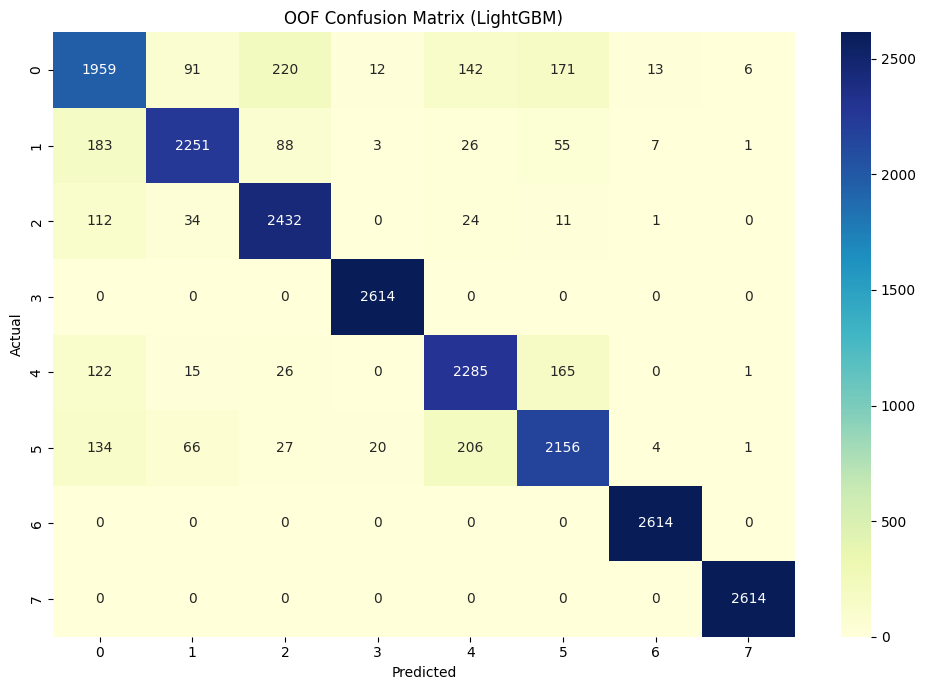

In [95]:
from sklearn.metrics import classification_report, confusion_matrix # Import classification_report and confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # Import numpy

y_true = np.array(y_encoded)
y_pred = np.array(results_lgbm['oof_preds'])

unique_label_indices = np.unique(np.concatenate((y_true, y_pred)))
label_names = [str(cls) for cls in le.inverse_transform(unique_label_indices)]

print("\nClassification Report (LightGBM):")
print(classification_report(
    y_true,
    y_pred,
    labels=unique_label_indices,
    target_names=label_names
))

conf_matrix = confusion_matrix(y_true, y_pred, labels=unique_label_indices)

plt.figure(figsize=(10, 7))
sns.heatmap(
    conf_matrix,
    annot=True, fmt='d', cmap='YlGnBu',
    xticklabels=label_names,
    yticklabels=label_names
)
plt.title("OOF Confusion Matrix (LightGBM)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()



In [99]:
from scipy.sparse import hstack # Import hstack
from scipy.sparse import csr_matrix # Import csr_matrix
import numpy as np # Import numpy

# Instead of creating a placeholder with 1 feature:
# math_features_test = csr_matrix(np.zeros((test_df.shape[0], 1)))

# Create an empty sparse matrix with 0 features:
math_features_test = csr_matrix(np.empty((test_df.shape[0], 0)))

# OR: remove math_features_test from hstack

test_features_combined = hstack([
    tfidf.transform(test_df['Question']),
    math_features_test  #  This now has 0 features
])

# Alternatively, to have 1 math feature:
# Ensure math_features_test has been calculated for the test set with 1 feature per row
# using the same logic as with train_df

test_preds_encoded = results_lgbm['models'][0].predict(test_features_combined)

test_preds = le.inverse_transform(test_preds_encoded)

submission = pd.DataFrame({
    'id': test_df['id'],
    'label': test_preds
})

submission.to_csv('submission.csv', index=False)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
